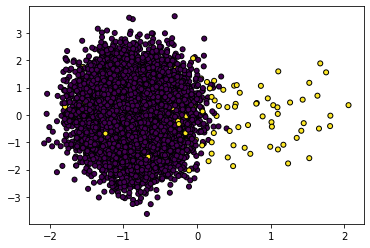

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X1, Y1 = make_classification(n_samples=10000, weights=[0.99],  n_clusters_per_class = 1, random_state = 2021 )
plt.scatter(X1[:, 0]  , X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

In [2]:
Y1

array([0, 0, 0, ..., 0, 0, 0])

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1)


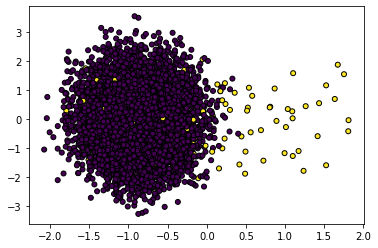

In [4]:
plt.scatter(X_train[:, 0]  , X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.show()

In [5]:
print('length of X_train: {}'.format(len(X_train)))
print('length of X_test: {}'.format(len(X_test)))
print('length of Y_train: {}'.format(len(Y_train)))
print('length of Y_test: {}'.format(len(Y_test)))

length of X_train: 7500
length of X_test: 2500
length of Y_train: 7500
length of Y_test: 2500


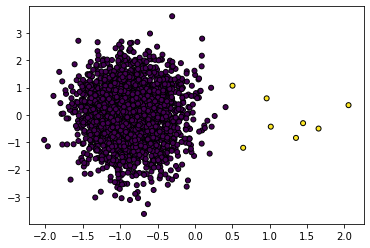

In [6]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression().fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [7]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      2469
     class 1       1.00      0.26      0.41        31

    accuracy                           0.99      2500
   macro avg       1.00      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500

[[2469    0]
 [  23    8]]


In [8]:
!pip install imblearn

##Random Oversampling + Logistic Regression

In [9]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler(sampling_strategy='minority')
X_re, Y_re = oversample.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


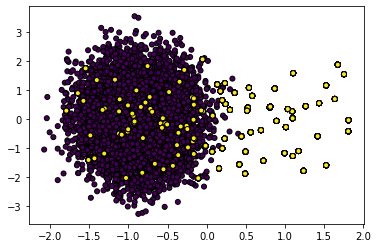

In [10]:
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')
plt.show()

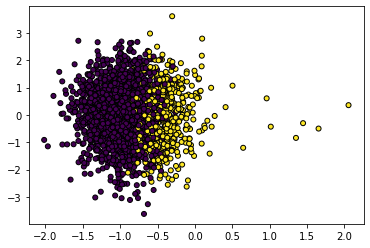

In [11]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       0.99      0.77      0.86      2469
     class 1       0.03      0.65      0.06        31

    accuracy                           0.76      2500
   macro avg       0.51      0.71      0.46      2500
weighted avg       0.98      0.76      0.86      2500

[[1890  579]
 [  11   20]]


##Random Undersampling + Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


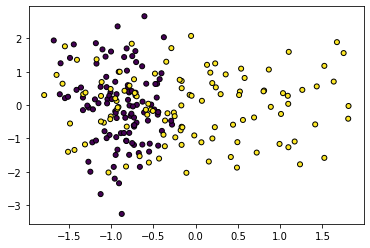

In [13]:
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(random_state=42)
X_re, Y_re = undersample.fit_resample(X_train, Y_train)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')
plt.show()

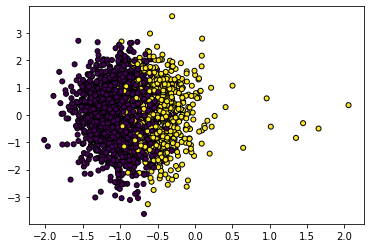

In [14]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       0.99      0.71      0.83      2469
     class 1       0.03      0.71      0.06        31

    accuracy                           0.71      2500
   macro avg       0.51      0.71      0.44      2500
weighted avg       0.98      0.71      0.82      2500

[[1755  714]
 [   9   22]]


##SMOTE + Logistic Regression

#k=5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


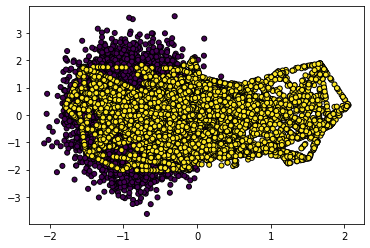

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', k_neighbors=5)
X_re,Y_re=sm.fit_sample(X1,Y1)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')
plt.show()

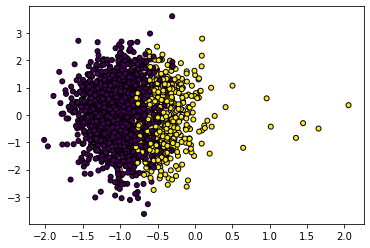

In [23]:
clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       1.00      0.77      0.87      2469
     class 1       0.04      0.71      0.07        31

    accuracy                           0.77      2500
   macro avg       0.52      0.74      0.47      2500
weighted avg       0.98      0.77      0.86      2500

[[1900  569]
 [   9   22]]


#k=3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


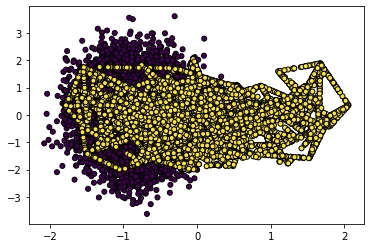

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', k_neighbors=3)
X_re,Y_re=sm.fit_sample(X1,Y1)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')
plt.show()

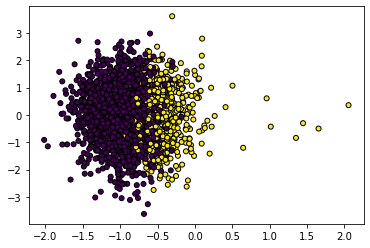

In [32]:
clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       1.00      0.78      0.87      2469
     class 1       0.04      0.71      0.07        31

    accuracy                           0.77      2500
   macro avg       0.52      0.74      0.47      2500
weighted avg       0.98      0.77      0.86      2500

[[1915  554]
 [   9   22]]


#k=10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


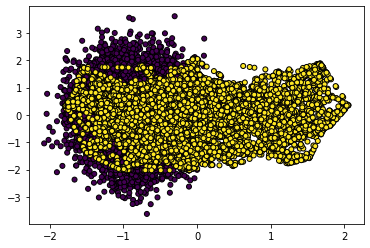

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', k_neighbors=10)
X_re,Y_re=sm.fit_sample(X1,Y1)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')
plt.show()

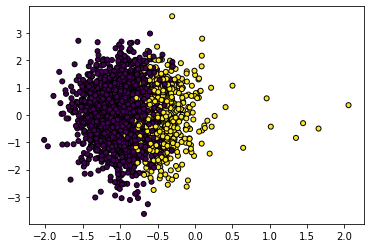

In [35]:
clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       1.00      0.78      0.87      2469
     class 1       0.04      0.71      0.07        31

    accuracy                           0.78      2500
   macro avg       0.52      0.74      0.47      2500
weighted avg       0.98      0.78      0.86      2500

[[1920  549]
 [   9   22]]


##ADASYN + Logistic Regression

#k=5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


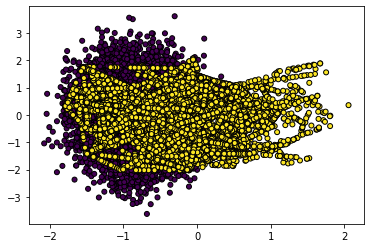

In [37]:
from imblearn.over_sampling import ADASYN
ada=ADASYN(n_neighbors=5)
X_re, Y_re=ada.fit_resample(X1,Y1)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')

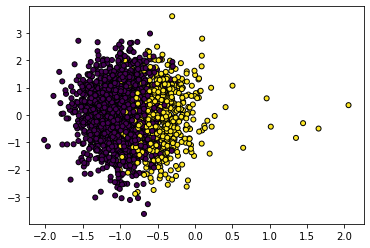

In [38]:
clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       1.00      0.73      0.84      2469
     class 1       0.03      0.74      0.06        31

    accuracy                           0.73      2500
   macro avg       0.51      0.73      0.45      2500
weighted avg       0.98      0.73      0.83      2500

[[1793  676]
 [   8   23]]


#k=3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


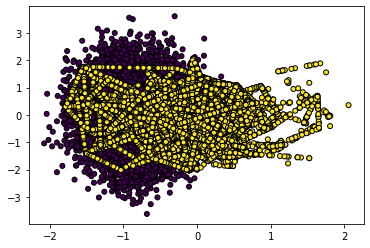

In [40]:
from imblearn.over_sampling import ADASYN
ada=ADASYN(n_neighbors=3)
X_re, Y_re=ada.fit_resample(X1,Y1)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')

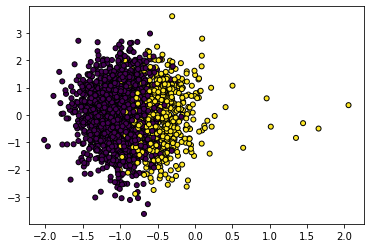

In [41]:
clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       1.00      0.72      0.84      2469
     class 1       0.03      0.77      0.07        31

    accuracy                           0.72      2500
   macro avg       0.52      0.75      0.45      2500
weighted avg       0.98      0.72      0.83      2500

[[1788  681]
 [   7   24]]


#k=10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


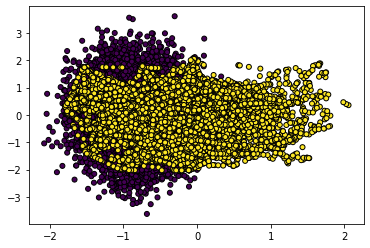

In [43]:
from imblearn.over_sampling import ADASYN
ada=ADASYN(n_neighbors=10)
X_re, Y_re=ada.fit_resample(X1,Y1)
plt.scatter(X_re[:, 0] , X_re[:, 1], marker='o', c=Y_re, s=25, edgecolor='k')

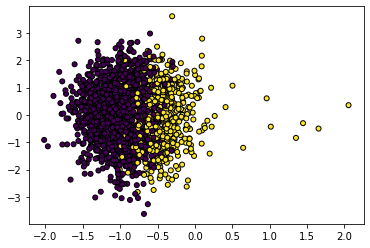

In [44]:
clf=LogisticRegression().fit(X_re,Y_re)
Y_pred=clf.predict(X_test)
plt.scatter(X_test[:, 0]  , X_test[:, 1], marker='o', c=Y_pred, s=25, edgecolor='k')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['class 0', 'class 1']))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

     class 0       1.00      0.74      0.85      2469
     class 1       0.03      0.74      0.07        31

    accuracy                           0.74      2500
   macro avg       0.51      0.74      0.46      2500
weighted avg       0.98      0.74      0.84      2500

[[1818  651]
 [   8   23]]
